<h1><center>Análise de um movimento com aceleração.</center></h1>
<p style="font-size:18px;text-align:justify">
Nesta aula iremos verificar experimentalmente alguns aspectos de um movimento que ocorre com a influência de uma aceleração. O vídeo abaixo mostra como o movimento ocorreu:
</p>


In [1]:
if True: 
    from IPython.display import HTML
    import matplotlib.pyplot as plt
    from numpy import *
    import seaborn
    from ipywidgets import widgets
    import numpy as np
    import pandas as pd
    from IPython.core.display import HTML
    import opencv as cv2
    HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: right;
        vertical-align: middle;
    }
    </style>
    """)
    

<center><video width="640" height="480" controls src="02 - MRUV.mp4" /></center>
<p style="text-align:center"><a href="02 - MRUV.mp4">Link para o vídeo.</a></p>
<p style="font-size:18px;text-align:justify">
Como é possível observar no vídeo acima, um rolinho desce uma rampa levemente inclinada partindo do repouso. Conforme o mesmo desce a rampa, sua velocidade aumenta. Abaixo, faremos um desenvolvimento teórico - prático - computacional para entender de que forma a velocidade do rolinho está variando.
</p>
<h2><center>Medições realizadas.</center></h2>
<p style="font-size:18px;text-align:justify">
Para realizar a análise do movimento, devemos primeiramente escolher quais grandezas mediremos. Para este movimento, iremos medir a posição (distância do objeto até a origem da régua) e o tempo decorrido para que o objeto atinja uma determinada posição.
De posse desses números, vamos realizar uma análise gráfica do movimento. Ná física, diferentemente da matemática, constuma-se utilizar a variável t (tempo) como variável INDEPENDENTE e a variável x (posição) como variável DEPENDENTE.
</p>
<p style="font-size:18px;text-align:justify">
Abaixo vão os dados medidos através do software Tracker:
</p>

In [6]:
if True:
    t = []
    x = []
    vx = []
    arq = open('02 - MRUV.dat')
    arq = arq.read()
    arq = arq.replace(',','.')
    arq = arq.replace('\t',' ')
    arq = arq.split('\n')
    
    for i in range(1,len(arq)-1):
        l = arq[i]
        l = l.split(' ')
        if l[0]:
            t.append(float(l[0]))
            x.append(float(l[1]))
            vx.append(float(l[2]))

    t = array(t)
    x = array(x)
    n = len(t)
    vx = array(vx)
    print('Dados Brutos:')
    print("t (s)\tx (m)\tv(m/s)")
    for i in range(0,len(t)):
        print("%.2f\t%.2f\t%.2f" %(t[i],x[i],vx[i]))

Dados Brutos:
t (s)	x (m)	v(m/s)
0.50	0.01	0.03
1.00	0.03	0.04
1.50	0.05	0.05
2.00	0.08	0.07
2.50	0.12	0.08
3.00	0.16	0.08
3.50	0.20	0.09
4.00	0.25	0.10
4.50	0.30	0.11
5.00	0.36	0.11


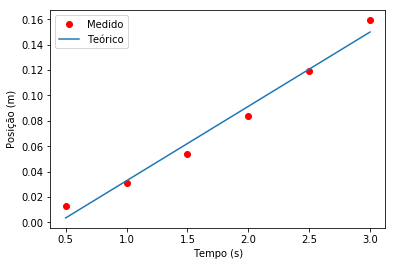

Equação do movimento: 
x =0.059t - 0.026


In [25]:
if True:
    l1 = plt.plot(t[:-4],x[:-4],'ro',label='Medido')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Posição (m)')
    coef = polyfit(t[:-4],x[:-4],1)
    fit = coef[0] * t[:-4] + coef[1]
    l2 = plt.plot(t[:-4],fit,label='Teórico')
    plt.legend()
    plt.show()
    print('Equação do movimento: ')
    print('x =%.3ft - %.3f'%(coef[0],-1*coef[1]))

<p style="font-size:18px;text-align:justify">
Como feito anteriormente (no estudo do movimento com velocidade constante), realizamos um ajuste linear em cima dos dados medidos. Fizemos isto pois foi a tática que deu certo no movimento anterior. Porém, <font color=red>será que o ajuste realizado é o melhor possível para este conjunto de dados? </font>
</p>
<p style="font-size:18px;text-align:justify">
Bom, para tentar responder esta pergunta, vamos ver o que acontece com a reta teórica e com os dados reais quando quando <font color=green>prolongamos as duas curvas.</font>
</p>


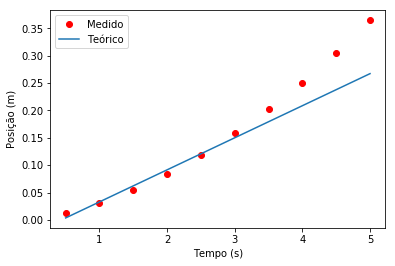

In [27]:
if True:
    l1 = plt.plot(t,x,'ro',label='Medido')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Posição (m)')
    fit = coef[0] * t + coef[1]
    l2 = plt.plot(t,fit,label='Teórico')
    plt.legend()
    plt.show()

<p style="font-size:18px;text-align:justify">
Como é possível verificar, <font color=green> os dados medidos estão <b>DIVERGINDO</b> do modelo teórico adotado!</font>
</p>
<p style="font-size:18px;text-align:justify">
Nestes casos, não há outra solução senão mudar o modelo proposto. Ainda no sentido de sempre encontrar a função mais simples possível que descreve bem os dados, vamos tentar ajustar uma parábola na forma:
</p>
\begin{equation}
x(t) = x_0 + v_0 t + \frac{a t^2}{2}
\end{equation}
<p style="font-size:18px;text-align:justify">
O trecho de código abaixo (em python) faz um ajuste estatístico chamado de mínimos quadrados e mostra o gráfico da reta que melhor se aproxima dos pontos medidos.
</p>

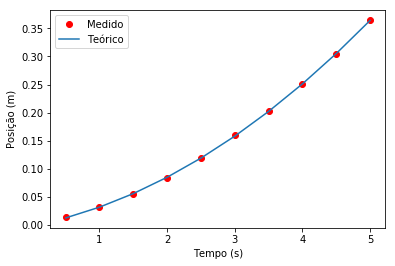

Equação do movimento: 
x =0.010t^2 + 0.023t - 0.002


In [18]:
if True:
    l1 = plt.plot(t,x,'ro',label='Medido')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Posição (m)')
    coef = polyfit(t,x,2)
    fit = coef[0] * t **2 + coef[1] * t + coef[2]
    l2 = plt.plot(t,fit,label='Teórico')
    plt.legend()
    plt.show()
    print('Equação do movimento: ')
    print('x =%.3ft^2 + %.3ft - %.3f'%(coef[0],coef[1],abs(coef[2])))

<p style="font-size:18px;text-align:justify">
Como é possível perceber, a reta se adapta bem aos pontos medidos e quando isto ocorre, dizemos que o movimento (ou o fenômeno em geral) é bem <i><b>descrito</b></i> pela equação proposta. 
</p>
<p style="font-size:18px;text-align:justify">
O coeficiente angular $v$ é a taxa de variação da posição do objeto em relação ao tempo. Sua unidade de medida é $\frac{m}{s}$ e possui um nome específico: <b>velocidade</b>. Para o movimento que acabamos de estudar, note que a velocidade é constante implicando que:<font color=red> O objeto percorre distâncias iguais em intervalos de tempo iguais.</font>
</p>
<p style="font-size:18px;text-align:justify">
Na verdade, devido ao pequeno atrito do rolinho com o ar e ao fato de o rolinho deslizar um pouco (e não apenas rolar) sobre a rampa, a velocidade dele tende a diminuir levemente com o tempo, o que pode ser evidenciado no gráfico abaixo.
</p>

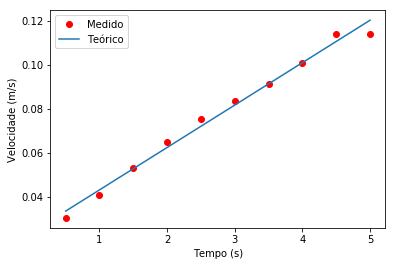

Equação da reta encontrada: 
v = 0.019t + 0.024


In [11]:
if True:
    l1 = plt.plot(t,vx,'ro',label='Medido')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    #plt.axis([0,4.1,0.05,0.12])
    coef = polyfit(t,vx,1)
    fit = coef[0] * t + coef[1]
    l2 = plt.plot(t,fit, label='Teórico')
    plt.legend()
    plt.show()
    print('Equação da reta encontrada: ')
    print('v = %.3ft + %.3f'%(abs(coef[0]),coef[1]))

<p style="font-size:18px;text-align:justify">
É claramente perceptível o fato da velocidade diminuir (reta azul). Porém, perceba que o coeficiente angular está zerado (dentro do número de casa decimais adotadas) e que o coeficiente linear é muito próximo do valor encontrado na equação para $v$. Desta forma, podemos <b>considerar</b> a velocidade do rolinho como sendo <b>constante</b> cometendo um erro aceitável.
</p>